In [164]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
wh_2019 = pd.read_csv('2019.csv')

In [6]:
wh_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [7]:
wh_2019 = wh_2019.drop(columns={'Overall rank'})

In [8]:
wh_2019

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [9]:
# we need to append a new column to our data, codes of the countries - ISO3

In [18]:
codes = pd.read_json('codes.json', orient='index')

In [19]:
codes = codes.reset_index()

In [20]:
codes = codes.rename(columns={'index': 'Code', 0: 'Country or region'})

In [21]:
codes

,Code,Country or region
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands
...,...,...
245,YEM,Yemen
246,ZAF,South Africa
247,ZMB,Zambia
248,ZWE,Zimbabwe


In [77]:
merged_wh_2019 = wh_2019.merge(codes, how='left', on='Country or region')

In [79]:
merged_wh_2019 = merged_wh_2019.set_index('Country or region')

In [161]:
merged_wh_2019 = merged_wh_2019.drop(index=63)

In [80]:
merged_wh_2019 = merged_wh_2019.rename(index={'United Kingdom':'United Kingdom of Great Britain'})
merged_wh_2019 = merged_wh_2019.rename(index={'United States':'United States of America'})
merged_wh_2019 = merged_wh_2019.rename(index={'Czech Republic':'Czechia'})
merged_wh_2019 = merged_wh_2019.rename(index={'Trinidad & Tobago':'Trinidad and Tobago'})
merged_wh_2019 = merged_wh_2019.rename(index={'South Korea':'Korea, Republic of'})
merged_wh_2019 = merged_wh_2019.rename(index={'Bolivia':'Bolivia (Plurinational State of)'})
merged_wh_2019 = merged_wh_2019.rename(index={'Russia':'Russian Federation'})
merged_wh_2019 = merged_wh_2019.rename(index={'Moldova':'Moldova, Republic of'})
merged_wh_2019 = merged_wh_2019.rename(index={'Vietnam':'Viet Nam'})
merged_wh_2019 = merged_wh_2019.rename(index={'Ivory Coast':'C\u00f4te d\'Ivoire'})
merged_wh_2019 = merged_wh_2019.rename(index={'Congo (Brazzaville)':'Congo'})
merged_wh_2019 = merged_wh_2019.rename(index={'Laos':'Lao People\'s Democratic Republic'})
merged_wh_2019 = merged_wh_2019.rename(index={'Venezuela':'Venezuela (Bolivarian Republic of)'})
merged_wh_2019 = merged_wh_2019.rename(index={'Palestinian Territories':'Palestine, State of'})
merged_wh_2019 = merged_wh_2019.rename(index={'Iran':'Iran (Islamic Republic of)'})
merged_wh_2019 = merged_wh_2019.rename(index={'Congo (Kinshasa)':'Congo, Democratic Republic of the'})
merged_wh_2019 = merged_wh_2019.rename(index={'Swaziland':'Eswatini'})
merged_wh_2019 = merged_wh_2019.rename(index={'Syria':'Syrian Arab Republic'})
merged_wh_2019 = merged_wh_2019.rename(index={'Tanzania':'Tanzania, United Republic of'})

In [82]:
merged_wh_2019 = merged_wh_2019.merge(codes, how='left', on='Country or region')

In [86]:
merged_wh_2019 = merged_wh_2019.drop(columns='Code_x')

In [87]:
merged_wh_2019 = merged_wh_2019.rename(columns={'Code_y': 'Code'})

In [92]:
merged_wh_2019[merged_wh_2019.Code.isnull()]

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Code


In [94]:
merged_wh_2019 = merged_wh_2019.rename(columns={'Country or region': 'Country'})

In [93]:
# Time to explore our dataset

In [95]:
merged_wh_2019

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Code
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD
...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,RWA
152,"Tanzania, United Republic of",3.231,0.476,0.885,0.499,0.417,0.276,0.147,TZA
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,AFG
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,CAF


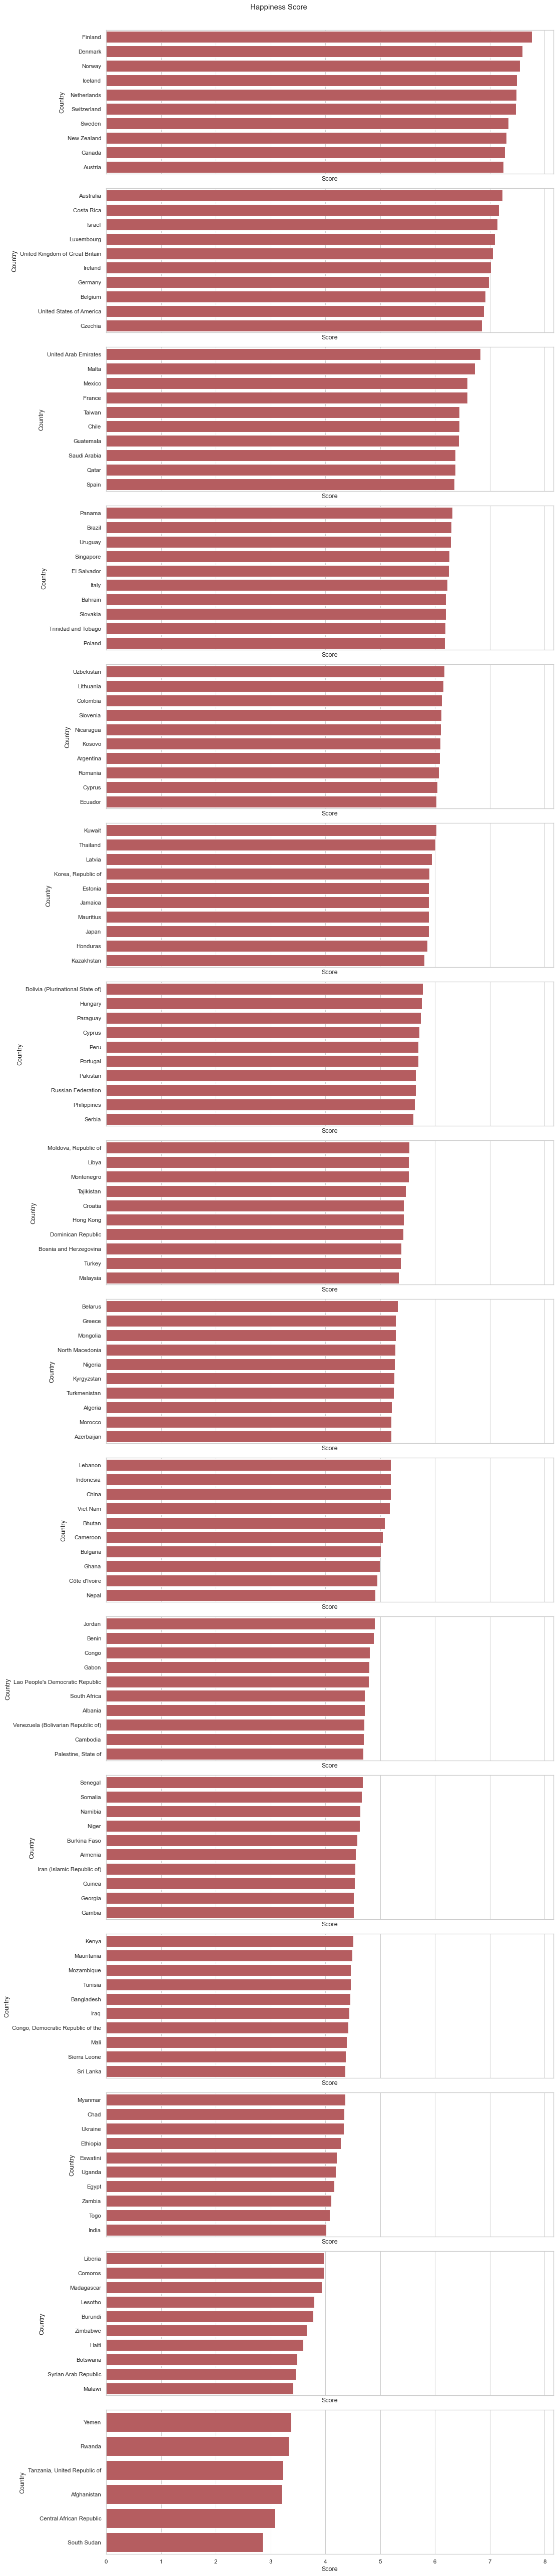

In [134]:
fig, axis = plt.subplots(nrows=16, sharex=True, figsize=(15, 70), dpi=75)
sb.set(style='whitegrid')
fig.suptitle('Happiness Score')

data = merged_wh_2019[['Country', 'Score']]
startIndex = 0
endIndex = 10

for r in range(0, 16):
    sb.barplot(x='Score', y='Country', data=data[startIndex:endIndex], ax=axis[r], color='r')
    startIndex += 10
    endIndex += 10

fig.tight_layout()
fig.subplots_adjust(top=.97)


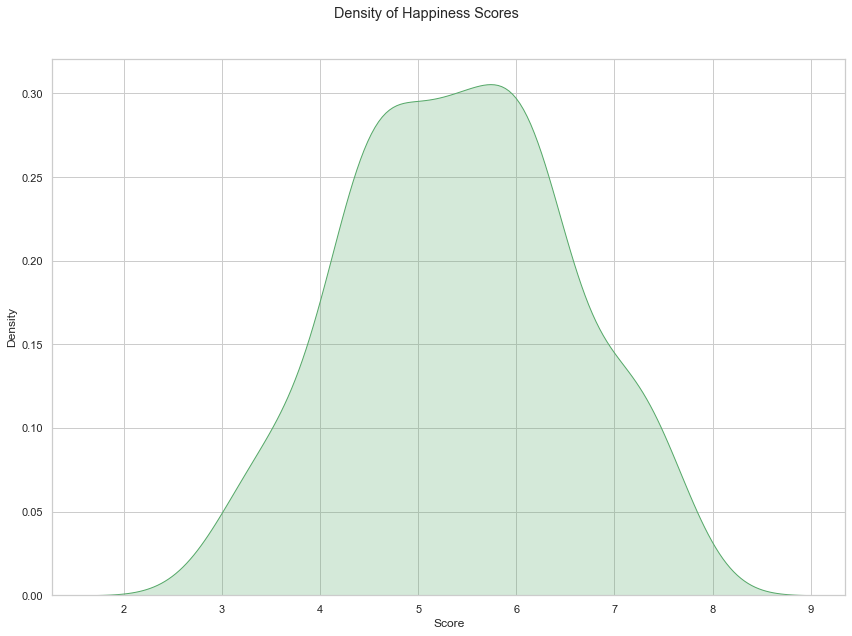

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 9))
sb.set(style='whitegrid')
fig.suptitle('Density of Happiness Scores')

data = merged_wh_2019['Score']

sb.kdeplot(data=data, shade=True, color='g', ax=ax)
fig.tight_layout()
fig.subplots_adjust(top=0.9)

<AxesSubplot:xlabel='Score', ylabel='Country'>

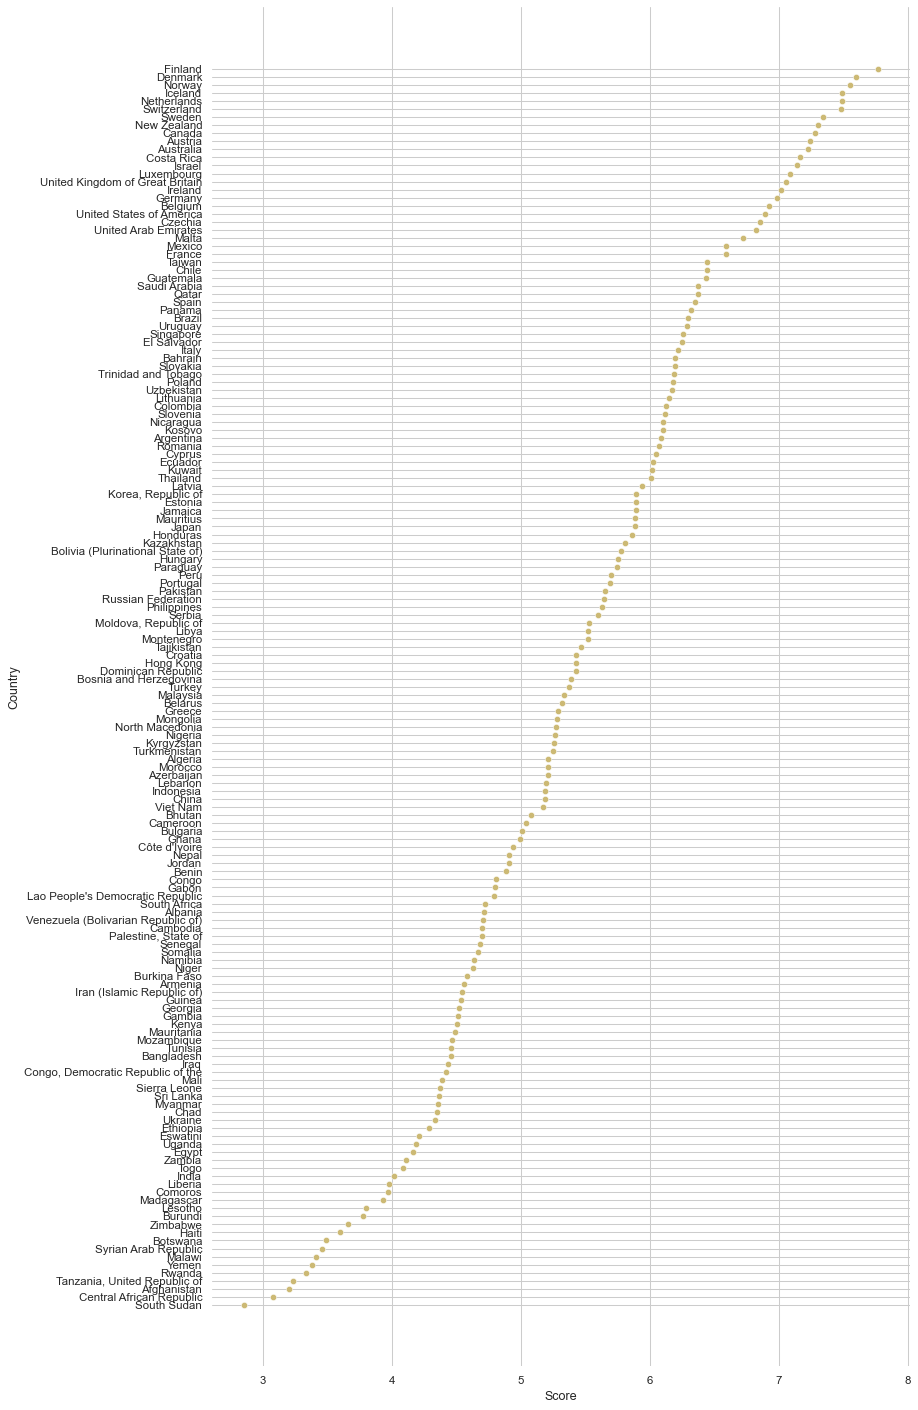

In [162]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 24), dpi=75)
sb.despine(bottom=True, left=True)
sb.set(style='whitegrid')
fig.suptitle('')

data = merged_wh_2019[['Country', 'Score']]

sb.scatterplot(x='Score', y='Country', data=data, color='y', ax=ax)

In [170]:
merged_wh_2019.to_json('scores2019.json', orient='records')

In [224]:
wh_2018 = pd.read_csv('2018.csv')

In [225]:
wh_2018 = wh_2018.rename(columns={'Country or region': 'Country'})

In [226]:
wh_2018 = wh_2018.drop(columns=['Overall rank'])

In [227]:
wh_2018 = wh_2018.set_index('Country')

In [228]:
wh_2018 = wh_2018.rename(index={'United Kingdom':'United Kingdom of Great Britain'})
wh_2018 = wh_2018.rename(index={'United States':'United States of America'})
wh_2018 = wh_2018.rename(index={'Czech Republic':'Czechia'})
wh_2018 = wh_2018.rename(index={'Trinidad & Tobago':'Trinidad and Tobago'})
wh_2018 = wh_2018.rename(index={'South Korea':'Korea, Republic of'})
wh_2018 = wh_2018.rename(index={'Bolivia':'Bolivia (Plurinational State of)'})
wh_2018 = wh_2018.rename(index={'Russia':'Russian Federation'})
wh_2018 = wh_2018.rename(index={'Moldova':'Moldova, Republic of'})
wh_2018 = wh_2018.rename(index={'Vietnam':'Viet Nam'})
wh_2018 = wh_2018.rename(index={'Ivory Coast':'C\u00f4te d\'Ivoire'})
wh_2018 = wh_2018.rename(index={'Congo (Brazzaville)':'Congo'})
wh_2018 = wh_2018.rename(index={'Laos':'Lao People\'s Democratic Republic'})
wh_2018 = wh_2018.rename(index={'Venezuela':'Venezuela (Bolivarian Republic of)'})
wh_2018 = wh_2018.rename(index={'Palestinian Territories':'Palestine, State of'})
wh_2018 = wh_2018.rename(index={'Iran':'Iran (Islamic Republic of)'})
wh_2018 = wh_2018.rename(index={'Congo (Kinshasa)':'Congo, Democratic Republic of the'})
wh_2018 = wh_2018.rename(index={'Swaziland':'Eswatini'})
wh_2018 = wh_2018.rename(index={'Syria':'Syrian Arab Republic'})
wh_2018 = wh_2018.rename(index={'Tanzania':'Tanzania, United Republic of'})
wh_2018 = wh_2018.rename(index={'Macedonia': 'North Macedonia'})

In [229]:
wh_2018 = wh_2018.reset_index()

In [230]:
codes = codes.rename(columns={'Country or region': 'Country'})

In [231]:
merged_wh_2018 = wh_2018.merge(codes, how='left', on='Country')

In [232]:
merged_wh_2018[merged_wh_2018.Country == 'Northern Cyprus']
merged_wh_2018 = merged_wh_2018.drop(index=57)

In [233]:
merged_wh_2018[merged_wh_2018.Code.isnull()]

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Code


In [234]:
merged_wh_2018[merged_wh_2018['Perceptions of corruption'].isnull()]

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Code
19,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,ARE


In [235]:
merged_wh_2018.to_json('scores2018.json', orient='records')

In [260]:
wh_2017 = pd.read_csv('2017.csv')

In [261]:
wh_2017 = wh_2017.drop(columns=['Happiness.Rank'])

In [262]:
wh_2017 = wh_2017.drop(columns=['Whisker.high', 'Whisker.low'])

In [263]:
wh_2017 = wh_2017.drop(columns=['Dystopia.Residual'])
wh_2017 = wh_2017.drop(index=60)

In [264]:
wh_2017 = wh_2017.rename(columns={'Happiness.Score': 'Score', 'Economy..GDP.per.Capita.': 'GDP per capita', 'Family': 'Social support', 'Health..Life.Expectancy.': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', 'Trust..Government.Corruption.': 'Perceptions of corruption'})

In [265]:
wh_2017 = wh_2017.set_index('Country')

In [266]:
wh_2017 = wh_2017.rename(index={'United Kingdom':'United Kingdom of Great Britain'})
wh_2017 = wh_2017.rename(index={'United States':'United States of America'})
wh_2017 = wh_2017.rename(index={'Czech Republic':'Czechia'})
wh_2017 = wh_2017.rename(index={'Trinidad & Tobago':'Trinidad and Tobago'})
wh_2017 = wh_2017.rename(index={'South Korea':'Korea, Republic of'})
wh_2017 = wh_2017.rename(index={'Bolivia':'Bolivia (Plurinational State of)'})
wh_2017 = wh_2017.rename(index={'Russia':'Russian Federation'})
wh_2017 = wh_2017.rename(index={'Moldova':'Moldova, Republic of'})
wh_2017 = wh_2017.rename(index={'Vietnam':'Viet Nam'})
wh_2017 = wh_2017.rename(index={'Ivory Coast':'C\u00f4te d\'Ivoire'})
wh_2017 = wh_2017.rename(index={'Congo (Brazzaville)':'Congo'})
wh_2017 = wh_2017.rename(index={'Laos':'Lao People\'s Democratic Republic'})
wh_2017 = wh_2017.rename(index={'Venezuela':'Venezuela (Bolivarian Republic of)'})
wh_2017 = wh_2017.rename(index={'Palestinian Territories':'Palestine, State of'})
wh_2017 = wh_2017.rename(index={'Iran':'Iran (Islamic Republic of)'})
wh_2017 = wh_2017.rename(index={'Congo (Kinshasa)':'Congo, Democratic Republic of the'})
wh_2017 = wh_2017.rename(index={'Swaziland':'Eswatini'})
wh_2017 = wh_2017.rename(index={'Syria':'Syrian Arab Republic'})
wh_2017 = wh_2017.rename(index={'Tanzania':'Tanzania, United Republic of'})
wh_2017 = wh_2017.rename(index={'Macedonia': 'North Macedonia'})
wh_2017 = wh_2017.rename(index={'Taiwan Province of China': 'Taiwan'})
wh_2017 = wh_2017.rename(index={'Hong Kong S.A.R., China': 'Hong Kong'})

In [267]:
merged_wh_2017 = wh_2017.merge(codes, how='left', on='Country')

In [268]:
merged_wh_2017[merged_wh_2017.Code.isnull()]

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Code


In [270]:
merged_wh_2017.to_json('scores2017.json', orient='records')

In [290]:
wh_2016 = pd.read_csv('2016.csv')

In [291]:
wh_2016 = wh_2016.drop(columns=['Happiness Rank'])

In [292]:
wh_2016 = wh_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])

In [293]:
wh_2016 = wh_2016.drop(index=[61, 96])

In [294]:
wh_2016 = wh_2016.rename(columns={'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP per capita', 'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', 'Trust (Government Corruption)': 'Perceptions of corruption'})

In [295]:
wh_2016 = wh_2016.set_index('Country')

In [296]:
wh_2016 = wh_2016.rename(index={'United Kingdom':'United Kingdom of Great Britain'})
wh_2016 = wh_2016.rename(index={'United States':'United States of America'})
wh_2016 = wh_2016.rename(index={'Czech Republic':'Czechia'})
wh_2016 = wh_2016.rename(index={'Trinidad & Tobago':'Trinidad and Tobago'})
wh_2016 = wh_2016.rename(index={'South Korea':'Korea, Republic of'})
wh_2016 = wh_2016.rename(index={'Bolivia':'Bolivia (Plurinational State of)'})
wh_2016 = wh_2016.rename(index={'Russia':'Russian Federation'})
wh_2016 = wh_2016.rename(index={'Moldova':'Moldova, Republic of'})
wh_2016 = wh_2016.rename(index={'Vietnam':'Viet Nam'})
wh_2016 = wh_2016.rename(index={'Ivory Coast':'C\u00f4te d\'Ivoire'})
wh_2016 = wh_2016.rename(index={'Congo (Brazzaville)':'Congo'})
wh_2016 = wh_2016.rename(index={'Laos':'Lao People\'s Democratic Republic'})
wh_2016 = wh_2016.rename(index={'Venezuela':'Venezuela (Bolivarian Republic of)'})
wh_2016 = wh_2016.rename(index={'Palestinian Territories':'Palestine, State of'})
wh_2016 = wh_2016.rename(index={'Iran':'Iran (Islamic Republic of)'})
wh_2016 = wh_2016.rename(index={'Congo (Kinshasa)':'Congo, Democratic Republic of the'})
wh_2016 = wh_2016.rename(index={'Swaziland':'Eswatini'})
wh_2016 = wh_2016.rename(index={'Syria':'Syrian Arab Republic'})
wh_2016 = wh_2016.rename(index={'Tanzania':'Tanzania, United Republic of'})
wh_2016 = wh_2016.rename(index={'Macedonia': 'North Macedonia'})
wh_2016 = wh_2016.rename(index={'Taiwan Province of China': 'Taiwan'})
wh_2016 = wh_2016.rename(index={'Hong Kong S.A.R., China': 'Hong Kong'})

In [297]:
merged_wh_2016 = wh_2016.merge(codes, how='left', on='Country')

In [298]:
merged_wh_2016[merged_wh_2016.Code.isnull()]

,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Code


In [299]:
merged_wh_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       155 non-null    object 
 1   Region                        155 non-null    object 
 2   Score                         155 non-null    float64
 3   GDP per capita                155 non-null    float64
 4   Social support                155 non-null    float64
 5   Healthy life expectancy       155 non-null    float64
 6   Freedom to make life choices  155 non-null    float64
 7   Perceptions of corruption     155 non-null    float64
 8   Generosity                    155 non-null    float64
 9   Code                          155 non-null    object 
dtypes: float64(7), object(3)
memory usage: 18.3+ KB


In [300]:
merged_wh_2016.to_json('scores2016.json', orient='records')

In [316]:
wh_2015 = pd.read_csv('2015.csv')

In [317]:
wh_2015 = wh_2015.drop(columns=['Happiness Rank', 'Standard Error', 'Dystopia Residual'])

In [318]:
wh_2015 = wh_2015.drop(index=[65, 90])

In [319]:
wh_2015 = wh_2015.rename(columns={'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP per capita', 'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', 'Trust (Government Corruption)': 'Perceptions of corruption'})

In [320]:
wh_2015 = wh_2015.set_index('Country')

In [321]:
wh_2015 = wh_2015.rename(index={'United States':'United States of America'})
wh_2015 = wh_2015.rename(index={'United Kingdom':'United Kingdom of Great Britain'})
wh_2015 = wh_2015.rename(index={'Czech Republic':'Czechia'})
wh_2015 = wh_2015.rename(index={'Trinidad & Tobago':'Trinidad and Tobago'})
wh_2015 = wh_2015.rename(index={'South Korea':'Korea, Republic of'})
wh_2015 = wh_2015.rename(index={'Bolivia':'Bolivia (Plurinational State of)'})
wh_2015 = wh_2015.rename(index={'Russia':'Russian Federation'})
wh_2015 = wh_2015.rename(index={'Moldova':'Moldova, Republic of'})
wh_2015 = wh_2015.rename(index={'Vietnam':'Viet Nam'})
wh_2015 = wh_2015.rename(index={'Ivory Coast':'C\u00f4te d\'Ivoire'})
wh_2015 = wh_2015.rename(index={'Congo (Brazzaville)':'Congo'})
wh_2015 = wh_2015.rename(index={'Laos':'Lao People\'s Democratic Republic'})
wh_2015 = wh_2015.rename(index={'Venezuela':'Venezuela (Bolivarian Republic of)'})
wh_2015 = wh_2015.rename(index={'Palestinian Territories':'Palestine, State of'})
wh_2015 = wh_2015.rename(index={'Iran':'Iran (Islamic Republic of)'})
wh_2015 = wh_2015.rename(index={'Congo (Kinshasa)':'Congo, Democratic Republic of the'})
wh_2015 = wh_2015.rename(index={'Swaziland':'Eswatini'})
wh_2015 = wh_2015.rename(index={'Syria':'Syrian Arab Republic'})
wh_2015 = wh_2015.rename(index={'Tanzania':'Tanzania, United Republic of'})
wh_2015 = wh_2015.rename(index={'Macedonia': 'North Macedonia'})
wh_2015 = wh_2015.rename(index={'Taiwan Province of China': 'Taiwan'})
wh_2015 = wh_2015.rename(index={'Hong Kong S.A.R., China': 'Hong Kong'})

In [322]:
merged_wh_2015 = wh_2015.merge(codes, how='left', on='Country')

In [323]:
merged_wh_2015[merged_wh_2015.Code.isnull()]

,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Code


In [326]:
merged_wh_2015.to_json('scores2015.json', orient='records')